# Setup

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [7]:
df=pd.read_csv("Customer-Churn-Records.csv")
#https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

# Data structure

In [8]:
df.columns,df.shape

(Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
        'Satisfaction Score', 'Card Type', 'Point Earned'],
       dtype='object'),
 (10000, 18))

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00000,1,1,1,101348.88000,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86000,1,0,1,112542.58000,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80000,3,1,0,113931.57000,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00000,2,0,0,93826.63000,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82000,1,1,1,79084.10000,0,0,5,GOLD,425


In [10]:
# Chech for missing values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

The dataset is clean

# Exploratory Data analysis

The key variable is the exit rate which is equal to the ratio of customers that left the bank divided by total customers

In [11]:
#Drop first three columns, Rownumber , CustomerId, Surname
df.drop(["RowNumber","CustomerId"],inplace=True,axis=1)

In [12]:
df["Exited"].value_counts(normalize=True)

Exited
0   0.79620
1   0.20380
Name: proportion, dtype: float64

The exit rate is 20%

In [13]:
# define customers that did not exit
df["Not_Exited"]=df["Exited"].apply(lambda x: 1 if x==0 else 0)

In [14]:
df.groupby("Geography")[["Exited","Not_Exited"]].agg("mean")

,Exited,Not_Exited
Geography,,
France,0.16175,0.83825
Germany,0.32443,0.67557
Spain,0.16673,0.83327


The highest exit rates are found in Germany, where the exit rate is almost double that of france and Spain


<Axes: ylabel='Exited'>

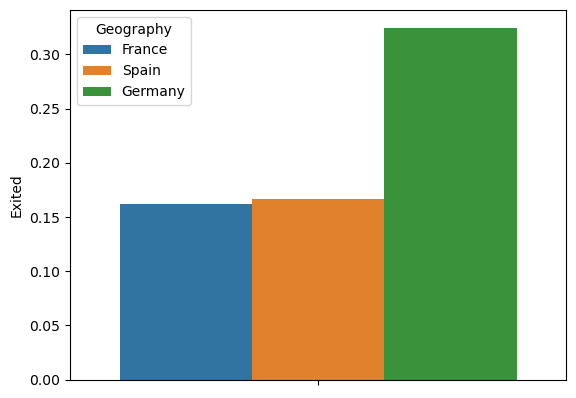

In [15]:
sns.barplot(data=df,y="Exited",hue="Geography",ci=False)

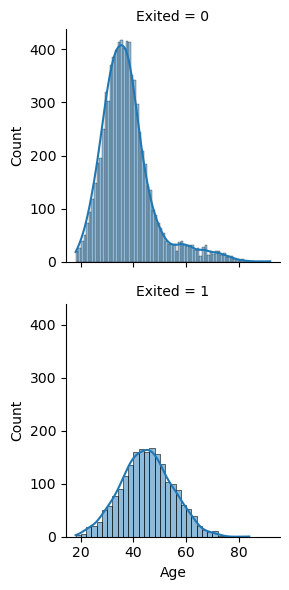

In [16]:
graph=sns.FacetGrid(df,row="Exited")
graph.map(sns.histplot,"Age",kde=True)

In [17]:

#Define two functions that return the first and third quantiles
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)



def stats(x):
    #Returns main statistic metrics, to be used with pd.groupby 
    dict={x:["mean","median","std",q1,q3]}
    return(dict)

In [18]:
df.groupby("Exited").agg(stats("Age"))

Age                                    
           mean   median      std       q1       q3
Exited                                             
0      37.40806 36.00000 10.12596 31.00000 41.00000
1      44.83562 45.00000  9.75975 38.00000 51.00000

Clients that exited tend to be older than the ones that remained 

In [19]:
df.groupby("Exited")["Complain"].mean()

Exited
0   0.00126
1   0.99804
Name: Complain, dtype: float64

Almost all of the clients that left had a previously complained

In [20]:
df.groupby("Exited")["Satisfaction Score"].mean()

Exited
0   3.01796
1   2.99755
Name: Satisfaction Score, dtype: float64

The average satisfaction score for clients that exited is almost equal to the average satisfaction score of clients that remained as clients with the bank. This  indicates that either the satisfaction score was not calculated properly or something else happened that did not correlate directly with the client's satisfaction score (eg. A new bank started offering better services)

In [21]:
df.groupby("Exited").agg(stats("Balance"))

Balance                                                  
              mean       median         std          q1           q3
Exited                                                              
0      72742.75066  92063.06000 62851.57711     0.00000 126419.33000
1      91109.47601 109344.23000 58346.48320 38591.22250 131423.63750

Clients that left tended to have a higher balance in their account

In [22]:
df.groupby("Exited").agg(stats("EstimatedSalary"))

EstimatedSalary                                                  
                  mean       median         std          q1           q3
Exited                                                                  
0          99726.85314  99620.35500 57399.95672 50783.29500 148602.44500
1         101509.90878 102489.33500 57932.62339 51924.02000 152443.85750

Clients that left the bank had a slightly higher salary on average. The difference is not that high and the average salary is almost identical for both groups

<Axes: xlabel='Card Type', ylabel='Value'>

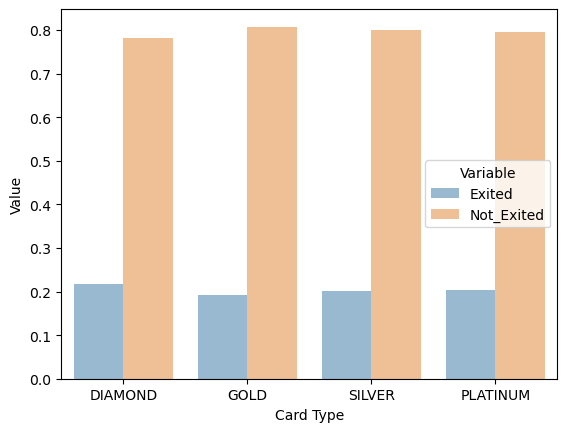

In [23]:
sns.barplot(
    df.melt(id_vars="Card Type",value_vars=["Exited","Not_Exited"],var_name="Variable",value_name="Value"),
x="Card Type",y="Value",hue="Variable",ci=False,alpha=0.5
)

In [24]:
df.pivot_table(index="Card Type",values="Exited",aggfunc="mean")

,Exited
Card Type,
DIAMOND,0.21779
GOLD,0.19265
PLATINUM,0.20361
SILVER,0.20112


 The average exit rates are not that different, depending on the type of card each customer has

In [25]:
df.groupby("Exited").agg(stats("Tenure"))

Tenure                                
          mean  median     std      q1      q3
Exited                                        
0      5.03278 5.00000 2.88050 3.00000 7.00000
1      4.93474 5.00000 2.93677 2.00000 8.00000

There are no large differences on exit rates based on tenure

In [26]:
df.groupby("Tenure")["Exited"].mean()

Tenure
0    0.23002
1    0.22415
2    0.19179
3    0.21110
4    0.20526
5    0.20652
6    0.20269
7    0.17218
8    0.19220
9    0.21748
10   0.20612
Name: Exited, dtype: float64

The highest exit rates are found in new clients specifically those that have been clients of the bank for less that 2 years. Furthermore high exit rates are also found in the oldest clients (9 years)

# Supervised learning, Logistic Regression classification
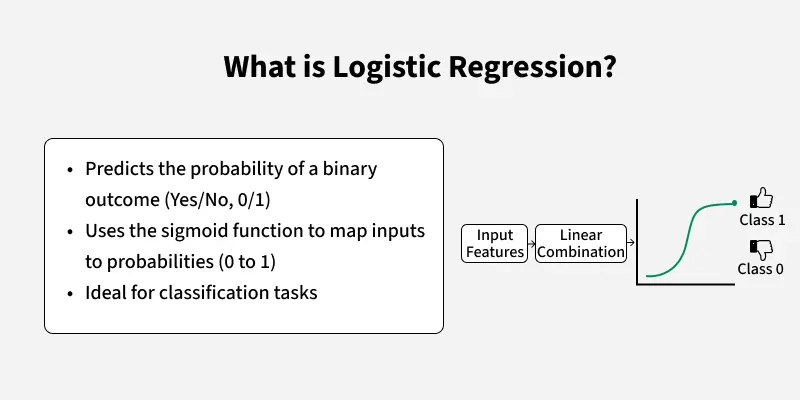
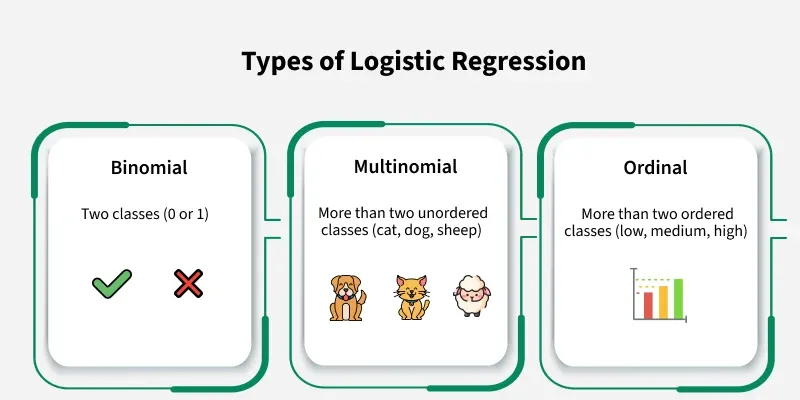
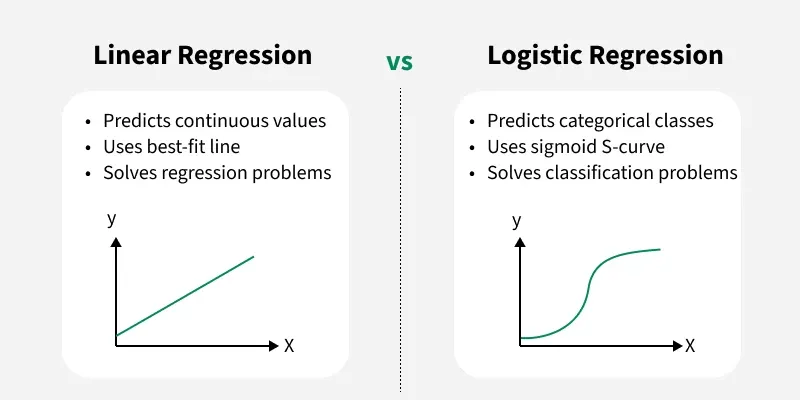
Images from https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/

### Hyperparameters
Regularization Strength (C): Controls the inverse of regularization, affecting the trade-off between fitting the data well and maintaining simplicity.
Smaller C (e.g., 0.01) → Stronger regularization → Simpler model, may underfit.
Larger C (e.g., 100) → Weaker regularization → Model fits more closely to the training data, may overfit.
Penalty Type: Determines whether L1 (Lasso) or L2 (Ridge) regularization is used. L1 regularization can produce a sparse model, while L2 tends to distribute error among all features.
Solver: Algorithm used for optimization (e.g., "liblinear", "lbfgs", "saga"). The choice of solver can impact both speed and convergence.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random
random.seed(150)

In [28]:
#We dont need this variable anymore
df=df.drop(["Not_Exited","Surname"],axis=1)

In [29]:
df2=df

In [30]:
df2=pd.get_dummies(df, drop_first=False)

In [31]:
X=df2.drop("Exited",axis=1)
y=df["Exited"]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
model=LogisticRegression()

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7855
Confusion Matrix:
 [[1545   48]
 [ 381   26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.35      0.06      0.11       407

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000



83% of predictions are accurate (accuracy score). 
Precision answers the question "Out of all the items the model labeled as positive, how many were actually positive"
While recall answers the question "Of all the actual positive instances, how many did the model correctly identify"
The The F1 score considers both precision and recall, giving a balanced view of the model's performance. 

We see that our model performs purely in predicting the customers that left the bank while it has a better precision and recall when predicting if a customer stays on the bank. We will scale our X data to see if the above metrics improve

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_standard_standarized=StandardScaler().fit_transform(X)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_standard_standarized,y,test_size=0.2)

In [39]:
model=LogisticRegression()

In [40]:
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9975
Confusion Matrix:
 [[1589    4]
 [   1  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       0.99      1.00      0.99       407

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



The accuracy score is 99.85% while the presicion and recall metrics are equal to 1. We will try a min_max scaler next

In [43]:
from sklearn.preprocessing import MinMaxScaler
X_minmax=MinMaxScaler().fit_transform(X)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2)

In [45]:
model=LogisticRegression()

In [46]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred=model.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9985
Confusion Matrix:
 [[1600    2]
 [   1  397]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1602
           1       0.99      1.00      1.00       398

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



We get the same results as with standard scaler
We continue with cross validation with  standardized features

In [49]:

from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, X_standard_standarized, y, cv=5)


In [50]:
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.995 1.    1.    1.    0.998]
Average score: 0.9986


The average accuracy is 99.86% . Next we will check which variables are the most influential in determining whether a customer stays with the bank or leaves but the problem is that our dataset is unbalanced, next we will focus on improving recall , since falsely assuming a customer will stay and he leaves is costly for the bank

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']        # Type of regularization
}

In [53]:
grid = GridSearchCV(model, param_grid, cv=5, scoring='recall')

In [56]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [59]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation recall:", grid.best_score_)
print("Test recall:", grid.score(X_test, y_test))

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Cross-Validation recall: 0.998165137614679
Test recall: 0.9975308641975309


In [73]:
model=LogisticRegression(C=0.01,penalty="l2")
model.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [75]:
#oefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients

CreditScore          -0.03400
Age                   0.35141
Tenure               -0.03783
Balance               0.12775
NumOfProducts        -0.06186
HasCrCard            -0.03390
IsActiveMember       -0.30665
EstimatedSalary       0.03036
Complain              3.77637
Satisfaction Score    0.00228
Point Earned         -0.02805
Geography_France     -0.12408
Geography_Germany     0.21715
Geography_Spain      -0.09311
Gender_Female         0.12123
Gender_Male          -0.12127
Card Type_DIAMOND     0.02788
Card Type_GOLD       -0.01618
Card Type_PLATINUM   -0.00556
Card Type_SILVER     -0.00616
dtype: float64

In [76]:
# Sort by importance (absolute value)
important_vars = coefficients.abs().sort_values(ascending=False)
important_vars

Complain             3.77637
Age                  0.35141
IsActiveMember       0.30665
Geography_Germany    0.21715
Balance              0.12775
Geography_France     0.12408
Gender_Male          0.12127
Gender_Female        0.12123
Geography_Spain      0.09311
NumOfProducts        0.06186
Tenure               0.03783
CreditScore          0.03400
HasCrCard            0.03390
EstimatedSalary      0.03036
Point Earned         0.02805
Card Type_DIAMOND    0.02788
Card Type_GOLD       0.01618
Card Type_SILVER     0.00616
Card Type_PLATINUM   0.00556
Satisfaction Score   0.00228
dtype: float64

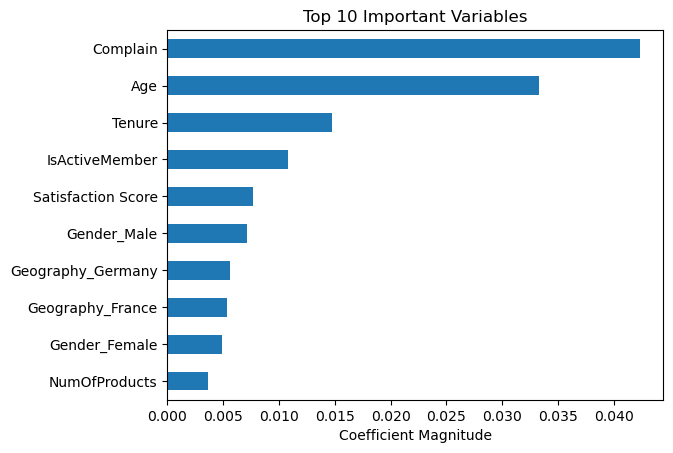

In [ ]:
important_vars.head(10).plot(kind='barh')
plt.xlabel('Coefficient Magnitude')
plt.title('Top 10 Important Variables')
plt.gca().invert_yaxis()
plt.show()